# Exercise M6.02

The aim of this exercise is to explore some attributes available in scikit-learn's random forest.

First, we wil fit the penguins regression dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
penguins = pd.read_csv("data/penguins_regression.csv")
feature_names = ["Flipper Length (mm)"]
target_name = "Body Mass (g)"
data, target = penguins[feature_names], penguins[target_name]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0
)

In [3]:
penguins.sample(5)

,Flipper Length (mm),Body Mass (g)
307,203.0,4100.0
19,174.0,3400.0
157,211.0,4800.0
245,214.0,4850.0
1,186.0,3800.0


Create a random forest containing three trees. Train the forest and check the generalization performance on the testing set in terms of absolute error.

In [4]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=3, n_jobs=2, random_state=0)
model.fit(data_train, target_train)
predicted = model.predict(data_test)

In [5]:
from sklearn.metrics import mean_absolute_error

print(
    f"Mean absolute error: " f"{mean_absolute_error(target_test, predicted):.3f} grams"
)

Mean absolute error: 345.349 grams


The next steps of this exercise are to:

* create a new dataset containing the penguins with a flipper length between 170mm and 230mm;
* plot the training data using a scatter plot;
* plot the decision of each individual tree by predicting on the newly created dataset;
* plot the decision of the random forest using this newly created dataset

In [6]:
data_ranges = pd.DataFrame(np.linspace(170, 235, num=300), columns=data.columns)

In [9]:
data_ranges.sample(4)

,Flipper Length (mm)
142,200.869565
150,202.608696
104,192.608696
264,227.391304


In [10]:
tree_predictions = []
for tree in model.estimators_:
    tree_predictions.append(tree.predict(data_ranges))

forest_predictions = model.predict(data_ranges)

/Users/athena/opt/miniconda3/envs/work/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/athena/opt/miniconda3/envs/work/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/athena/opt/miniconda3/envs/work/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Now we can plot the predictions that we collected

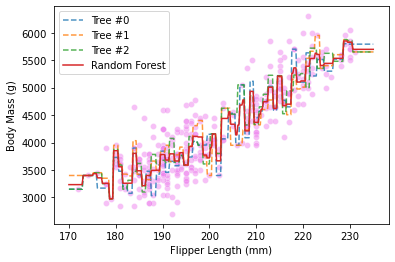

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=penguins, x=feature_names[0], y=target_name, color="violet", alpha=0.5
)
# plot tree predictions
for tree_idx, predictions in enumerate(tree_predictions):
    plt.plot(
        data_ranges, predictions, label=f"Tree #{tree_idx}", linestyle="--", alpha=0.8
    )

plt.plot(data_ranges, forest_predictions, label=f"Random Forest")
plt.legend();